In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	981.2348

Best Fitness:	948.3862
Solution:	900.0000
Diff:		48.3862

[0:02:32][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.2127

Best Fitness:	937.5965
Solution:	900.0000
Diff:		37.5965

[0:04:36][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.5031

Best Fitness:	942.6735
Solution:	900.0000
Diff:		42.6735

[0:06:29][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.2132

Best Fitness:	937.7318
Solution:	900.0000
Diff:		37.7318

[0:08:35][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.3538

Best Fitness:	938.3459
Solution:	900.0000
Diff:		38.3459

[0:10:29][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	983.6119

Best Fitness:	950.0582
Solution:	900.0000
Diff:		50.0582

[0:12:29][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	982.1528

Best Fitness:	940.6346
Solution:	900.0000
Diff:		40.6346

[0:14:19][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	982.4214

Best Fitness:	944.7230
Solution:	900.0000
Diff:		44.7230

[0:16:24][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.6330

Best Fitness:	950.6905
Solution:	900.0000
Diff:		50.6905

[0:18:27][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	978.8142

Best Fitness:	936.4880
Solution:	900.0000
Diff:		36.4880

[0:20:37][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.4789

Best Fitness:	941.4322
Solution:	900.0000
Diff:		41.4322

[0:22:25][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.6734

Best Fitness:	931.0872
Solution:	900.0000
Diff:		31.0872

[0:24:17][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	981.4053

Best Fitness:	952.3228
Solution:	900.0000
Diff:		52.3228

[0:26:16][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	982.5176

Best Fitness:	948.8256
Solution:	900.0000
Diff:		48.8256

[0:28:07][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	978.8550

Best Fitness:	942.7015
Solution:	900.0000
Diff:		42.7015

[0:30:12][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	976.4422

Best Fitness:	942.3593
Solution:	900.0000
Diff:		42.3593

[0:32:00][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	984.9715

Best Fitness:	944.2861
Solution:	900.0000
Diff:		44.2861

[0:34:00][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	976.1073

Best Fitness:	945.9516
Solution:	900.0000
Diff:		45.9516

[0:36:05][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.0313

Best Fitness:	919.4073
Solution:	900.0000
Diff:		19.4073

[0:38:11][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.9133

Best Fitness:	943.3827
Solution:	900.0000
Diff:		43.3827

[0:39:51][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	984.0654

Best Fitness:	944.6160
Solution:	900.0000
Diff:		44.6160

[0:41:25][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.7480

Best Fitness:	944.0500
Solution:	900.0000
Diff:		44.0500

[0:43:15][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.6311

Best Fitness:	949.0829
Solution:	900.0000
Diff:		49.0829

[0:44:48][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.3576

Best Fitness:	938.6878
Solution:	900.0000
Diff:		38.6878

[0:46:34][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	985.8040

Best Fitness:	948.9936
Solution:	900.0000
Diff:		48.9936

[0:48:25][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	981.7881

Best Fitness:	946.3838
Solution:	900.0000
Diff:		46.3838

[0:50:14][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.1068

Best Fitness:	924.4394
Solution:	900.0000
Diff:		24.4394

[0:52:00][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.1825

Best Fitness:	948.2733
Solution:	900.0000
Diff:		48.2733

[0:53:43][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	984.2221

Best Fitness:	951.1631
Solution:	900.0000
Diff:		51.1631

[0:55:17][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.5861

Best Fitness:	932.5663
Solution:	900.0000
Diff:		32.5663

[0:57:08][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	985.0739

Best Fitness:	947.2460
Solution:	900.0000
Diff:		47.2460

[0:58:31][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.5814

Best Fitness:	938.2970
Solution:	900.0000
Diff:		38.2970

[1:00:23][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	976.8972

Best Fitness:	938.1345
Solution:	900.0000
Diff:		38.1345

[1:02:11][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.8853

Best Fitness:	938.9997
Solution:	900.0000
Diff:		38.9997

[1:03:44][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	984.7274

Best Fitness:	947.8535
Solution:	900.0000
Diff:		47.8535

[1:05:45][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.9751

Best Fitness:	934.8629
Solution:	900.0000
Diff:		34.8629

[1:07:27][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	979.5289

Best Fitness:	948.1535
Solution:	900.0000
Diff:		48.1535

[1:09:08][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.4820

Best Fitness:	949.3817
Solution:	900.0000
Diff:		49.3817

[1:10:45][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	986.3715

Best Fitness:	954.6152
Solution:	900.0000
Diff:		54.6152

[1:12:28][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	982.2114

Best Fitness:	948.3002
Solution:	900.0000
Diff:		48.3002

[1:14:12][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	981.0200

Best Fitness:	942.8541
Solution:	900.0000
Diff:		42.8541

[1:15:50][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	976.5823

Best Fitness:	940.5870
Solution:	900.0000
Diff:		40.5870

[1:17:30][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	983.1699

Best Fitness:	949.7161
Solution:	900.0000
Diff:		49.7161

[1:19:10][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.5110

Best Fitness:	948.9745
Solution:	900.0000
Diff:		48.9745

[1:20:58][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	981.1531

Best Fitness:	945.6389
Solution:	900.0000
Diff:		45.6389

[1:22:44][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	982.2560

Best Fitness:	937.8199
Solution:	900.0000
Diff:		37.8199

[1:24:24][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	977.4345

Best Fitness:	933.5759
Solution:	900.0000
Diff:		33.5759

[1:26:04][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	987.5495

Best Fitness:	941.9619
Solution:	900.0000
Diff:		41.9619

[1:27:42][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	983.3532

Best Fitness:	945.7985
Solution:	900.0000
Diff:		45.7985

[1:29:24][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	980.1730

Best Fitness:	944.5039
Solution:	900.0000
Diff:		44.5039

[1:31:10][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	976.7770

Best Fitness:	942.5347
Solution:	900.0000
Diff:		42.5347

[1:32:48][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

1:32:48

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,78.835057,59.028663,57.258184,87.705234,54.003791,71.074739,92.782201,99.442727,80.329325,75.693527,...,68.29509,75.986858,89.456337,77.595459,74.403291,70.389379,63.788605,78.343694,72.499557,50
61,78.835057,59.028663,57.258184,87.705234,54.003791,71.074739,92.782201,99.442727,80.329325,75.693527,...,68.29509,75.986858,89.456337,77.595459,74.403291,70.389379,63.788605,78.343694,72.499557,50
62,78.835057,59.028663,57.258184,87.705234,54.003791,71.074739,92.782201,99.442727,80.329325,75.693527,...,68.29509,75.986858,89.456337,77.595459,74.403291,70.389379,63.788605,78.343694,72.499557,50
63,78.835057,59.028663,57.258184,87.705234,54.003791,71.074739,92.782201,99.442727,80.329325,75.693527,...,68.29509,75.986858,89.456337,77.595459,74.403291,70.389379,63.788605,78.343694,72.499557,50
64,78.835057,59.028663,57.258184,87.705234,54.003791,71.074739,92.782201,99.442727,80.329325,75.693527,...,68.29509,75.986858,89.456337,77.595459,74.403291,70.389379,63.788605,78.343694,72.499557,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 48.38622718636418

Best error for run 1: 37.596482010850764

Best error for run 2: 42.67348393544205

Best error for run 3: 37.73178103835994

Best error for run 4: 38.34587247716263

Best error for run 5: 50.05819122160892

Best error for run 6: 40.634574494463436

Best error for run 7: 44.72300968423701

Best error for run 8: 50.69045048767475

Best error for run 9: 36.48797557737066

Best error for run 10: 41.43219181693894

Best error for run 11: 31.0872345928467

Best error for run 12: 52.322779799823365

Best error for run 13: 48.82562283639413

Best error for run 14: 42.701540559578916

Best error for run 15: 42.359276642019495

Best error for run 16: 44.28613147655881

Best error for run 17: 45.95157312086462

Best error for run 18: 19.407251375205078

Best error for run 19: 43.3827379735219

Best error for run 20: 44.61604598874305

Best error for run 21: 44.049997122111336

Best error for run 22: 49.08292858152606

Best error for run 23: 38.687760595357645

Best error for run 24: 48.993576055948665

Best error for run 25: 46.38383908098001

Best error for run 26: 24.439402379990497

Best error for run 27: 48.27329239327469

Best error for run 28: 51.1631130494909

Best error for run 29: 32.56628953518259

Best error for run 30: 47.24595999000201

Best error for run 31: 38.296976734101236

Best error for run 32: 38.134473086865796

Best error for run 33: 38.99967752309067

Best error for run 34: 47.85353000747318

Best error for run 35: 34.86293925027678

Best error for run 36: 48.153452810019076

Best error for run 37: 49.38168106263254

Best error for run 38: 54.61518972570752

Best error for run 39: 48.30015807649124

Best error for run 40: 42.854147335281596

Best error for run 41: 40.58702698913635

Best error for run 42: 49.71606203595388

Best error for run 43: 48.97452344666203

Best error for run 44: 45.638935370383706

Best error for run 45: 37.81993397264728

Best error for run 46: 33.575884095589345

Best error for run 47: 41.96185527957982

Best error for run 48: 45.798463818623986

Best error for run 49: 44.50387181740291

Best error for run 50: 42.53471920807499

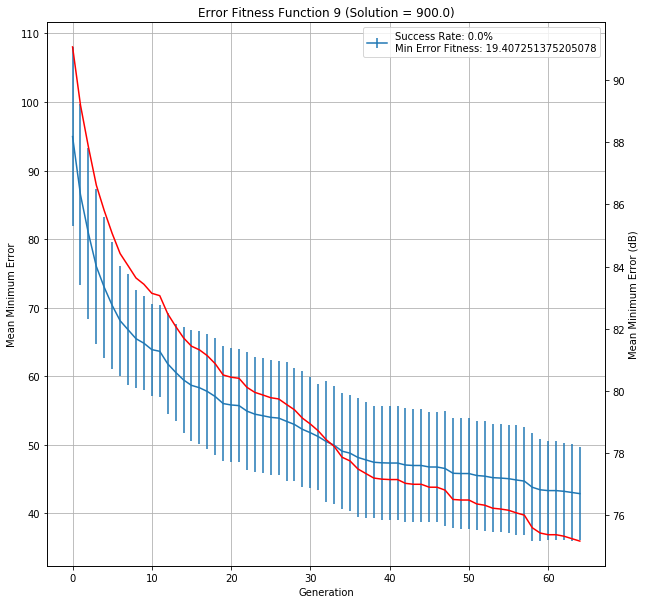

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.2,48.386227,37.596482,42.673484,37.731781,38.345872,50.058191,...,45.638935,37.819934,33.575884,41.961855,45.798464,44.503872,42.534719,42.885296,1:32:48,20100
